In [1]:
# Loading the important libraries 

import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Reading the dataset 

df = pd.read_csv('Jono_seba_medical_Dinajpur.csv')
print(df.shape)
df.head()

(226, 17)


,Age,Anaemia,Creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,cp,thalass,maxrate,target
0,60,0,1311,0,30,0,263358.03,1.8,113,1,1,186,0,0,1,158,0
1,65,0,167,0,30,0,259000.00,0.8,138,1,0,186,0,0,3,163,0
2,50,1,54,0,40,0,279000.00,0.8,141,1,0,250,0,0,3,138,0
3,62,0,231,1,25,1,253000.00,0.9,140,0,1,10,1,2,2,139,1
4,58,1,400,1,40,0,164000.00,1.0,139,1,0,91,0,2,2,170,1


In [3]:
print(df.columns)

Index(['Age', 'Anaemia', 'Creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT', 'cp', 'thalass', 'maxrate', 'target'],
      dtype='object')


In [4]:
for cols in df.columns:
    unique_vals = df[cols].unique()
    if len(unique_vals) <= 10:
        print("Feature ", cols, " has ", len(unique_vals), " unique values ----> ", unique_vals)
    else:
        print("Feature ", cols, " has ", len(unique_vals), " unique values")

Feature  Age  has  44  unique values
Feature  Anaemia  has  2  unique values ---->  [0 1]
Feature  Creatinine_phosphokinase  has  167  unique values
Feature  diabetes  has  2  unique values ---->  [0 1]
Feature  ejection_fraction  has  17  unique values
Feature  high_blood_pressure  has  2  unique values ---->  [0 1]
Feature  platelets  has  147  unique values
Feature  serum_creatinine  has  32  unique values
Feature  serum_sodium  has  24  unique values
Feature  sex  has  2  unique values ---->  [1 0]
Feature  smoking  has  2  unique values ---->  [1 0]
Feature  time  has  127  unique values
Feature  DEATH_EVENT  has  2  unique values ---->  [0 1]
Feature  cp  has  4  unique values ---->  [0 2 1 3]
Feature  thalass  has  4  unique values ---->  [1 3 2 0]
Feature  maxrate  has  82  unique values
Feature  target  has  2  unique values ---->  [0 1]


In [5]:
cat_features = ["cp", "thalass"]

In [6]:
df['target'].value_counts()

1    136
0     90
Name: target, dtype: int64

# Data Visualization 

## Display of distribution of important attributes through histplots

In [7]:
sns.set_style('whitegrid')

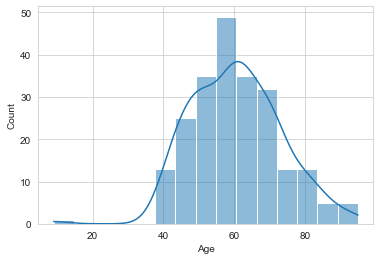

In [8]:
sns.histplot(x = 'Age', kde = True, bins= 15, data = df);

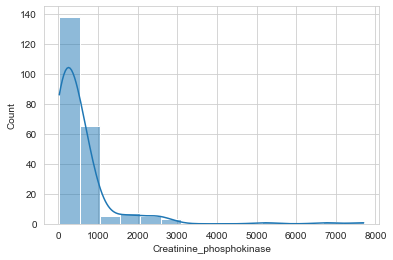

In [9]:
sns.histplot(x = 'Creatinine_phosphokinase', kde = True, bins=15, data = df);

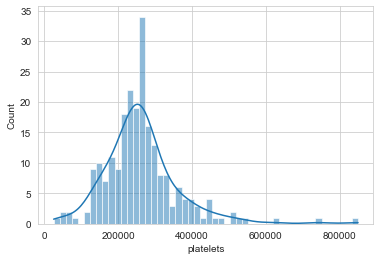

In [10]:
sns.histplot(x = 'platelets', kde = True, bins=50, data = df);

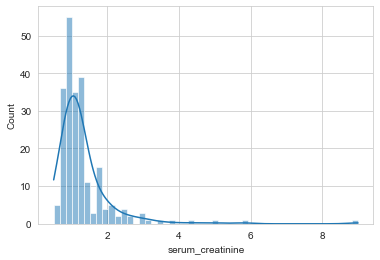

In [11]:
sns.histplot(x = 'serum_creatinine', kde = True, bins=50, data = df);

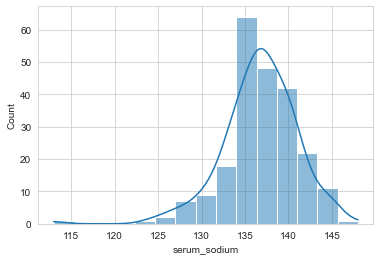

In [12]:
sns.histplot(x = 'serum_sodium', kde = True, bins=15, data = df);

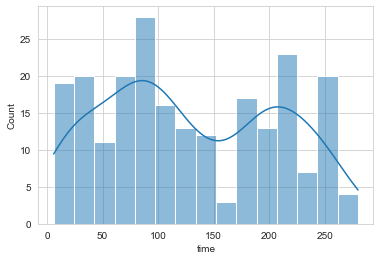

In [13]:
sns.histplot(x = 'time', kde = True, bins=15, data = df);

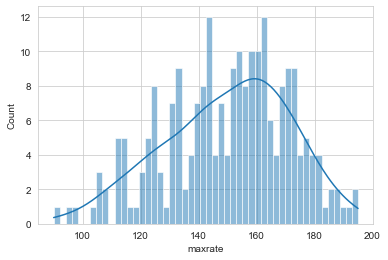

In [14]:
sns.histplot(x = 'maxrate', kde = True, bins=50, data = df);

# Data Pre-processing

In [15]:
# Checking for null values

df.isnull().sum()

Age                         0
Anaemia                     0
Creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
cp                          0
thalass                     0
maxrate                     0
target                      0
dtype: int64

In [16]:
# Removing duplicate entries if any

df.drop_duplicates(inplace = True)
print(df.shape)

(226, 17)


In [17]:
# Convert Catergorical values to numeric representation

df['cp'].replace({0:'A', 1:'B', 2:'C', 3:'D'}, inplace = True)
df['thalass'].replace({0:"P", 1:"Q", 2:"R", 3:"S"}, inplace = True)
df.head()

,Age,Anaemia,Creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,cp,thalass,maxrate,target
0,60,0,1311,0,30,0,263358.03,1.8,113,1,1,186,0,A,Q,158,0
1,65,0,167,0,30,0,259000.00,0.8,138,1,0,186,0,A,S,163,0
2,50,1,54,0,40,0,279000.00,0.8,141,1,0,250,0,A,S,138,0
3,62,0,231,1,25,1,253000.00,0.9,140,0,1,10,1,C,R,139,1
4,58,1,400,1,40,0,164000.00,1.0,139,1,0,91,0,C,R,170,1


In [18]:
df = pd.get_dummies(data = df, columns = cat_features)

In [19]:
df.head()

,Age,Anaemia,Creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,...,maxrate,target,cp_A,cp_B,cp_C,cp_D,thalass_P,thalass_Q,thalass_R,thalass_S
0,60,0,1311,0,30,0,263358.03,1.8,113,1,...,158,0,1,0,0,0,0,1,0,0
1,65,0,167,0,30,0,259000.00,0.8,138,1,...,163,0,1,0,0,0,0,0,0,1
2,50,1,54,0,40,0,279000.00,0.8,141,1,...,138,0,1,0,0,0,0,0,0,1
3,62,0,231,1,25,1,253000.00,0.9,140,0,...,139,1,0,0,1,0,0,0,1,0
4,58,1,400,1,40,0,164000.00,1.0,139,1,...,170,1,0,0,1,0,0,0,1,0


In [20]:
df.shape

(226, 23)

# Feature Scaling

In [21]:
df.describe()

,Age,Anaemia,Creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,...,maxrate,target,cp_A,cp_B,cp_C,cp_D,thalass_P,thalass_Q,thalass_R,thalass_S
count,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,...,226.000000,226.00000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000
mean,60.570796,0.429204,552.207965,0.402655,37.774336,0.362832,263278.657788,1.325929,136.707965,0.911504,...,149.783186,0.60177,0.464602,0.181416,0.287611,0.066372,0.008850,0.061947,0.548673,0.380531
std,12.650054,0.496061,893.205198,0.491521,11.931190,0.481884,103257.276981,0.859591,4.321896,0.284645,...,21.530792,0.49062,0.499852,0.386218,0.453653,0.249483,0.093863,0.241594,0.498730,0.486595
min,9.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,...,90.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,122.000000,0.000000,30.000000,0.000000,210250.000000,0.900000,134.000000,1.000000,...,134.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,60.000000,0.000000,264.000000,0.000000,38.000000,0.000000,256000.000000,1.100000,137.000000,1.000000,...,152.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,301750.000000,1.300000,140.000000,1.000000,...,165.000000,1.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,95.000000,1.000000,7702.000000,1.000000,80.000000,1.000000,850000.000000,9.000000,148.000000,1.000000,...,195.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
X = df.drop(columns = 'target') # X contains the features 
y= df['target']
print(X.shape)
X.head()

(226, 22)


,Age,Anaemia,Creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,...,DEATH_EVENT,maxrate,cp_A,cp_B,cp_C,cp_D,thalass_P,thalass_Q,thalass_R,thalass_S
0,60,0,1311,0,30,0,263358.03,1.8,113,1,...,0,158,1,0,0,0,0,1,0,0
1,65,0,167,0,30,0,259000.00,0.8,138,1,...,0,163,1,0,0,0,0,0,0,1
2,50,1,54,0,40,0,279000.00,0.8,141,1,...,0,138,1,0,0,0,0,0,0,1
3,62,0,231,1,25,1,253000.00,0.9,140,0,...,1,139,0,0,1,0,0,0,1,0
4,58,1,400,1,40,0,164000.00,1.0,139,1,...,0,170,0,0,1,0,0,0,1,0


In [23]:
X.describe()

,Age,Anaemia,Creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,...,DEATH_EVENT,maxrate,cp_A,cp_B,cp_C,cp_D,thalass_P,thalass_Q,thalass_R,thalass_S
count,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,...,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000
mean,60.570796,0.429204,552.207965,0.402655,37.774336,0.362832,263278.657788,1.325929,136.707965,0.911504,...,0.318584,149.783186,0.464602,0.181416,0.287611,0.066372,0.008850,0.061947,0.548673,0.380531
std,12.650054,0.496061,893.205198,0.491521,11.931190,0.481884,103257.276981,0.859591,4.321896,0.284645,...,0.466962,21.530792,0.499852,0.386218,0.453653,0.249483,0.093863,0.241594,0.498730,0.486595
min,9.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,...,0.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,122.000000,0.000000,30.000000,0.000000,210250.000000,0.900000,134.000000,1.000000,...,0.000000,134.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,60.000000,0.000000,264.000000,0.000000,38.000000,0.000000,256000.000000,1.100000,137.000000,1.000000,...,0.000000,152.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,301750.000000,1.300000,140.000000,1.000000,...,1.000000,165.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,95.000000,1.000000,7702.000000,1.000000,80.000000,1.000000,850000.000000,9.000000,148.000000,1.000000,...,1.000000,195.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
scale_vars = []

for cols in X.columns:
    if int(X[cols].max()) > 1:
        scale_vars.append(cols)
scale_vars

['Age',
 'Creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'time',
 'maxrate']

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)
print(X_train.shape)
print(X_test.shape)

(180, 22)
(46, 22)


In [26]:
scaler.fit(X_train[scale_vars])
X_train[scale_vars] = scaler.transform(X_train[scale_vars])
X_test[scale_vars] = scaler.transform(X_test[scale_vars])

# Feature Selection

In [27]:
X_test.head()

,Age,Anaemia,Creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,...,DEATH_EVENT,maxrate,cp_A,cp_B,cp_C,cp_D,thalass_P,thalass_Q,thalass_R,thalass_S
76,0.236364,1,0.055085,0,0.958333,1,0.288833,0.047619,0.742857,1,...,0,0.30,0,0,0,1,0,0,1,0
102,0.527273,0,0.072796,0,0.125000,0,0.292035,0.071429,0.600000,1,...,1,0.70,0,0,1,0,0,0,1,0
89,0.236364,0,0.005209,0,0.958333,0,0.415687,0.023810,0.628571,1,...,0,0.42,0,0,1,0,0,0,1,0
194,0.181818,1,0.035812,0,0.437500,0,0.408413,0.035714,0.771429,1,...,0,0.37,1,0,0,0,0,0,1,0
77,0.418182,0,0.118896,0,0.500000,0,0.338102,0.059524,0.571429,1,...,0,0.67,0,1,0,0,0,0,1,0


In [28]:
X_train.head()

,Age,Anaemia,Creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,...,DEATH_EVENT,maxrate,cp_A,cp_B,cp_C,cp_D,thalass_P,thalass_Q,thalass_R,thalass_S
197,0.272727,0,0.004818,1,0.437500,0,0.245969,0.071429,0.628571,1,...,0,0.78,0,0,1,0,0,0,0,1
120,0.363636,1,0.027087,0,0.229167,0,0.204752,0.130952,0.771429,1,...,0,0.36,1,0,0,0,0,0,1,0
140,0.290909,1,0.014585,1,0.500000,0,0.130804,0.130952,0.771429,1,...,0,0.31,0,0,1,0,0,0,1,0
199,0.272727,1,0.360854,0,0.437500,1,0.140502,0.047619,0.771429,1,...,0,0.35,1,0,0,0,0,0,0,1
47,0.363636,1,0.009506,1,0.958333,1,0.298097,0.011905,0.657143,1,...,0,0.73,0,0,1,0,0,0,1,0


In [29]:
featuresWithZeroVariance = []
for cols in X_train.columns:
    unique_vals = X_train[cols].unique()
    if len(unique_vals) == 1:
        featuresWithZeroVariance.append(cols)
featuresWithZeroVariance

[]

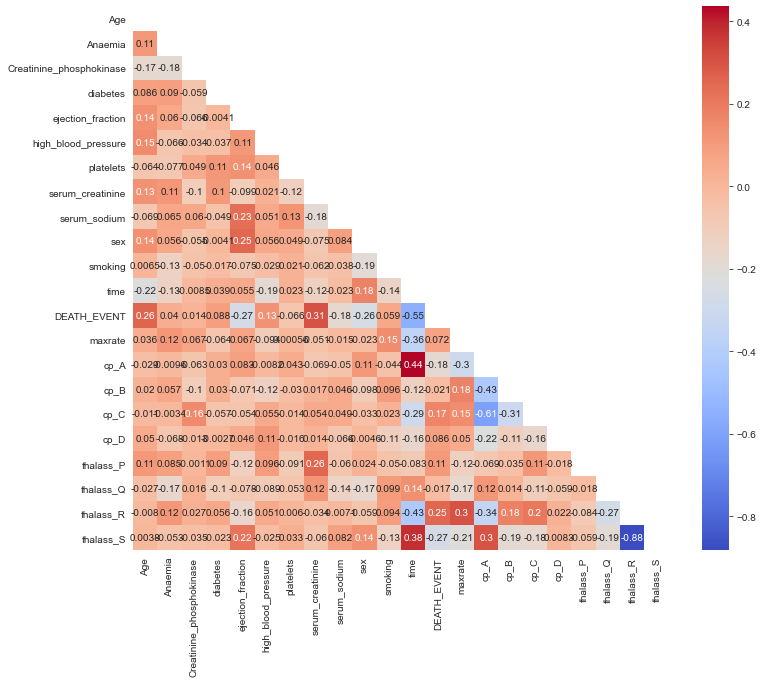

In [30]:
# Pearson's Correlation Coefficient

corr = X_train.corr()
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, cmap = "coolwarm", mask = mask1);

In [31]:
# with the following function we can select highly correlated features
# it will remove the first feature that is highly correlated with another feature

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of the redundant columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [32]:
corr_features = correlation(X_train, 0.8) # 85% is a good value of the threshold
print(len(corr_features))
print(corr_features)

1
{'thalass_S'}


In [33]:
X_train = X_train.drop(columns = corr_features)
X_test = X_test.drop(columns = corr_features)

print(X_train.shape)
print(X_test.shape)

(180, 21)
(46, 21)


# Evaluation and Model Creation

In [34]:
# ZeroR Classifier

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

clf = DummyClassifier(strategy = "most_frequent")
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

Train Accuracy:  0.6166666666666667
Test Accuracy:  0.5434782608695652

Classification Report
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        21
           1      0.543     1.000     0.704        25

    accuracy                          0.543        46
   macro avg      0.272     0.500     0.352        46
weighted avg      0.295     0.543     0.383        46



In [35]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
maxdepths = [5,10,15]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index], 
          ", Diff = ", np.abs((trainAcc[index]-testAcc[index])*100), " %")
    index += 1
    
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

Depth =  5 , Training Accuracy =  1.0 , Test Accuracy =  0.9782608695652174 , Diff =  2.1739130434782594  %
Depth =  10 , Training Accuracy =  1.0 , Test Accuracy =  0.9782608695652174 , Diff =  2.1739130434782594  %
Depth =  15 , Training Accuracy =  1.0 , Test Accuracy =  0.9782608695652174 , Diff =  2.1739130434782594  %

Classification Report
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        21
           1      0.543     1.000     0.704        25

    accuracy                          0.543        46
   macro avg      0.272     0.500     0.352        46
weighted avg      0.295     0.543     0.383        46



K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.6956521739130435 , Difference =  30.434782608695656 %
K =  5 , Training Accuracy =  0.8833333333333333  Test Accuracy =  0.8913043478260869 , Difference =  0.7971014492753614 %
K =  10 , Training Accuracy =  0.8388888888888889  Test Accuracy =  0.8913043478260869 , Difference =  5.241545893719801 %
K =  15 , Training Accuracy =  0.8611111111111112  Test Accuracy =  0.9130434782608695 , Difference =  5.193236714975836 %

Classification Report
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        21
           1      0.543     1.000     0.704        25

    accuracy                          0.543        46
   macro avg      0.272     0.500     0.352        46
weighted avg      0.295     0.543     0.383        46



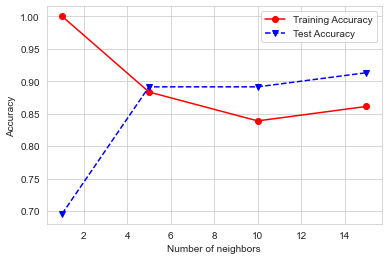

In [36]:
# KNN with Euclidean Distance Metric

from sklearn.neighbors import KNeighborsClassifier
numNeighbors = [1, 5, 10, 15]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1
    
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.717391304347826 , Difference =  28.260869565217394 %
K =  5 , Training Accuracy =  0.9  Test Accuracy =  0.9130434782608695 , Difference =  1.304347826086949 %
K =  10 , Training Accuracy =  0.8611111111111112  Test Accuracy =  0.9130434782608695 , Difference =  5.193236714975836 %
K =  15 , Training Accuracy =  0.8555555555555555  Test Accuracy =  0.9347826086956522 , Difference =  7.92270531400967 %

Classification Report
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        21
           1      0.543     1.000     0.704        25

    accuracy                          0.543        46
   macro avg      0.272     0.500     0.352        46
weighted avg      0.295     0.543     0.383        46



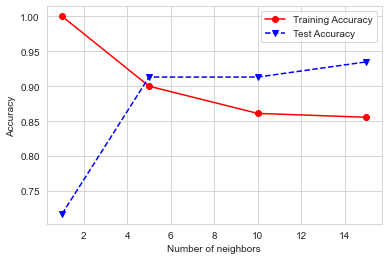

In [37]:
# KNN with Manhattan Metric

from sklearn.neighbors import KNeighborsClassifier
numNeighbors = [1, 5, 10, 15]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1
    
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

In [38]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty = 'none')

clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Logistic Regression with no regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print()

clf = LogisticRegression(penalty = 'l2')

clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Logistic Regression with L2 regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

Logistic Regression with no regularization
Train Accuracy:  1.0
Test Accuracy:  0.9782608695652174

Logistic Regression with L2 regularization
Train Accuracy:  0.95
Test Accuracy:  0.9565217391304348

Classification Report
              precision    recall  f1-score   support

           0      0.952     0.952     0.952        21
           1      0.960     0.960     0.960        25

    accuracy                          0.957        46
   macro avg      0.956     0.956     0.956        46
weighted avg      0.957     0.957     0.957        46



In [39]:
# Multinomial Naive Bayes Classifier

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

Train Accuracy:  0.8055555555555556
Test Accuracy:  0.8913043478260869

Classification Report
              precision    recall  f1-score   support

           0      0.900     0.857     0.878        21
           1      0.885     0.920     0.902        25

    accuracy                          0.891        46
   macro avg      0.892     0.889     0.890        46
weighted avg      0.892     0.891     0.891        46



In [40]:
#SVC Classifier

from sklearn.svm import SVC
from sklearn import metrics
clf = SVC(gamma = 'auto', random_state = 0)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

Train Accuracy:  0.9277777777777778
Test Accuracy:  0.9347826086956522

Classification Report
              precision    recall  f1-score   support

           0      0.950     0.905     0.927        21
           1      0.923     0.960     0.941        25

    accuracy                          0.935        46
   macro avg      0.937     0.932     0.934        46
weighted avg      0.935     0.935     0.935        46



In [ ]:

# Import required libraries for performance metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

# Define dictionary with performance metrics
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}

# Import required libraries for machine learning classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Instantiate the machine learning classifiers
log_model = LogisticRegression(max_iter=10000)
svc_model = LinearSVC(dual=False)
dtr_model = DecisionTreeClassifier()
rfc_model = RandomForestClassifier()
gnb_model = GaussianNB()

# Define the models evaluation function
def models_evaluation(X, y, folds):

    # Perform cross-validation to each machine learning classifier
    log = cross_validate(log_model, X, y, cv=folds, scoring=scoring)
    svc = cross_validate(svc_model, X, y, cv=folds, scoring=scoring)
    dtr = cross_validate(dtr_model, X, y, cv=folds, scoring=scoring)
    rfc = cross_validate(rfc_model, X, y, cv=folds, scoring=scoring)
    gnb = cross_validate(gnb_model, X, y, cv=folds, scoring=scoring)

    # Create a data frame with the models perfoamnce metrics scores
    models_scores_table = pd.DataFrame({'Logistic Regression':[log['test_accuracy'].mean(),
                                                               log['test_precision'].mean(),
                                                               log['test_recall'].mean(),
                                                               log['test_f1_score'].mean()],
                                       
                                      'Support Vector Classifier':[svc['test_accuracy'].mean(),
                                                                   svc['test_precision'].mean(),
                                                                   svc['test_recall'].mean(),
                                                                   svc['test_f1_score'].mean()],
                                       
                                      'Decision Tree':[dtr['test_accuracy'].mean(),
                                                       dtr['test_precision'].mean(),
                                                       dtr['test_recall'].mean(),
                                                       dtr['test_f1_score'].mean()],
                                       
                                      'Random Forest':[rfc['test_accuracy'].mean(),
                                                       rfc['test_precision'].mean(),
                                                       rfc['test_recall'].mean(),
                                                       rfc['test_f1_score'].mean()],
                                       
                                      'Gaussian Naive Bayes':[gnb['test_accuracy'].mean(),
                                                              gnb['test_precision'].mean(),
                                                              gnb['test_recall'].mean(),
                                                              gnb['test_f1_score'].mean()]},
                                      
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    # Add 'Best Score' column
    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    # Return models performance metrics scores data frame
    return(models_scores_table)

# Run models_evaluation function
models_evaluation(X_train_SMOTE, y_train_SMOTE, 5)
